# Arrests 

### By identifying which neighborhoods have the fewest arrests, the data also highlights which areas are likely the safest in the city. The neighborhoods with the highest number of arrests were consistent with areas typically associated with higher crime rates, and may not be safe. 

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
arrests = pd.read_csv('pgharrests.csv', on_bad_lines='skip')

In [59]:
# Keep key columns
cols_to_keep = ['AGE', 'GENDER', 'RACE', 'ARRESTTIME', 'ARRESTLOCATION', 'OFFENSES', 'INCIDENTNEIGHBORHOOD', 'X', 'Y']
arrests = arrests[cols_to_keep]

# Drop rows with missing neighborhood 
arrests = arrests.dropna(subset=['INCIDENTNEIGHBORHOOD'])

# Convert ARREST to datetime
arrests['ARRESTTIME'] = pd.to_datetime(arrests['ARRESTTIME'], errors='coerce')

# Extract year for time-based analysis
arrests['YEAR'] = arrests['ARRESTTIME'].dt.year

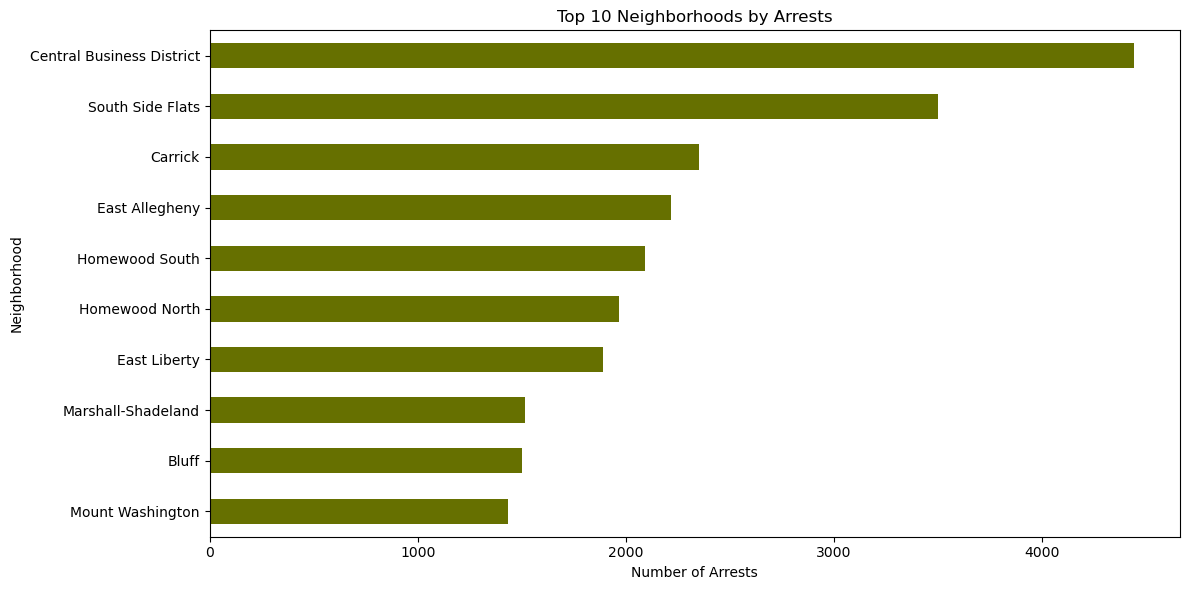

In [53]:
# Count arrests per neighborhood
neighborhood_counts = arrests['INCIDENTNEIGHBORHOOD'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
neighborhood_counts.sort_values().plot(kind='barh', color='#667000')
plt.title('Top 10 Neighborhoods by Arrests')
plt.xlabel('Number of Arrests')
plt.ylabel('Neighborhood')
plt.tight_layout()
plt.show()

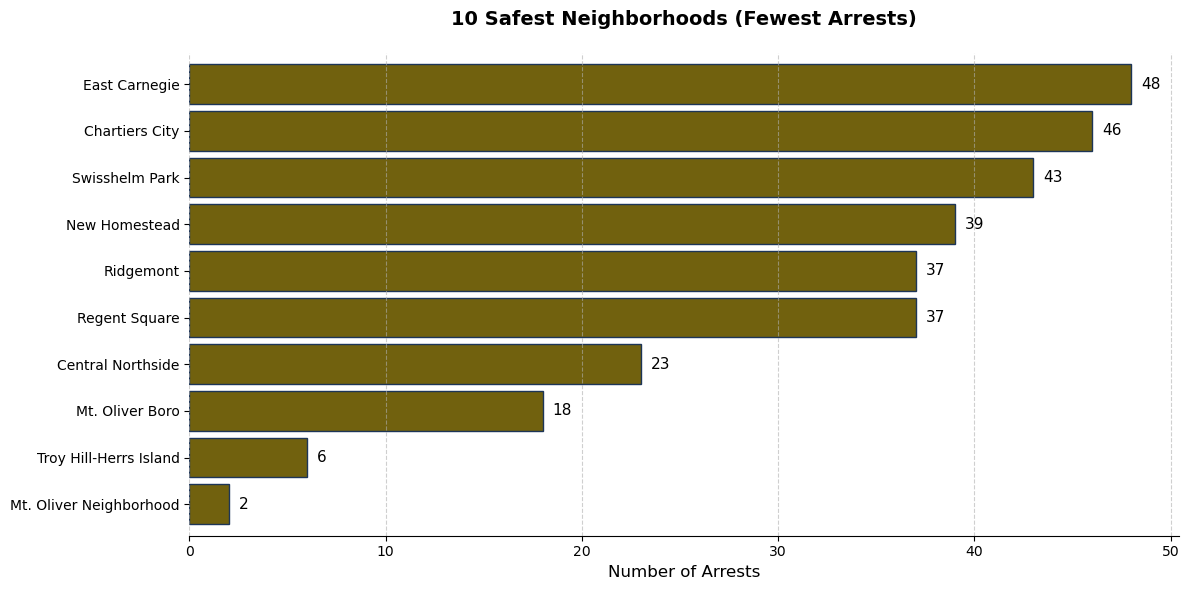

In [57]:
# Count citations per neighborhood and get BOTTOM 10
neighborhood_counts = arrests['INCIDENTNEIGHBORHOOD'].value_counts().nsmallest(10)

# Create the plot
plt.figure(figsize=(12, 6))
ax = neighborhood_counts.sort_values(ascending=True).plot(
    kind='barh',
    color='#71610e',  
    edgecolor='#1d3557',
    width=0.85
)

# Customize appearance
plt.title('10 Safest Neighborhoods (Fewest Arrests)', 
         fontsize=14, pad=20, weight='bold')
plt.xlabel('Number of Arrests', fontsize=12)
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add value labels
for i, v in enumerate(neighborhood_counts.sort_values()):
    ax.text(v + 0.5, i, f"{int(v)}", 
            color='black', 
            va='center',
            fontsize=11)

# Remove top/right spines
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

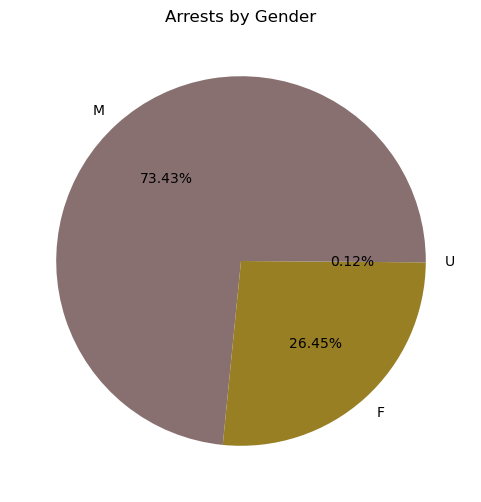

In [66]:
gender_counts = arrests['GENDER'].value_counts()

plt.figure(figsize=(6, 6))
gender_counts.plot(kind='pie', autopct='%.2f%%', colors=['#897070', '#987f24'])
plt.title('Arrests by Gender')
plt.ylabel('')
plt.show()

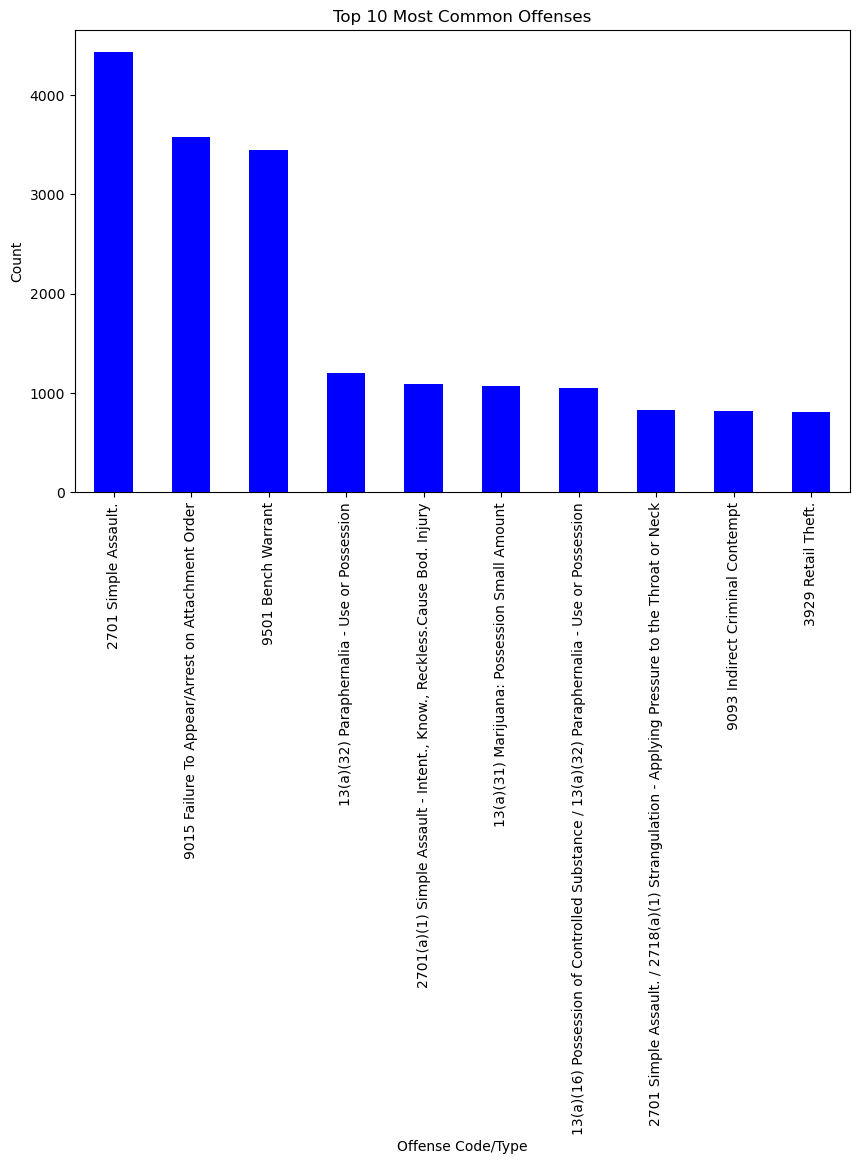

In [67]:

# Top 10 offenses
top_offenses = arrests['OFFENSES'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_offenses.plot(kind='bar', color='blue')
plt.title('Top 10 Most Common Offenses')
plt.xlabel('Offense Code/Type')
plt.ylabel('Count')
plt.xticks
plt.show()

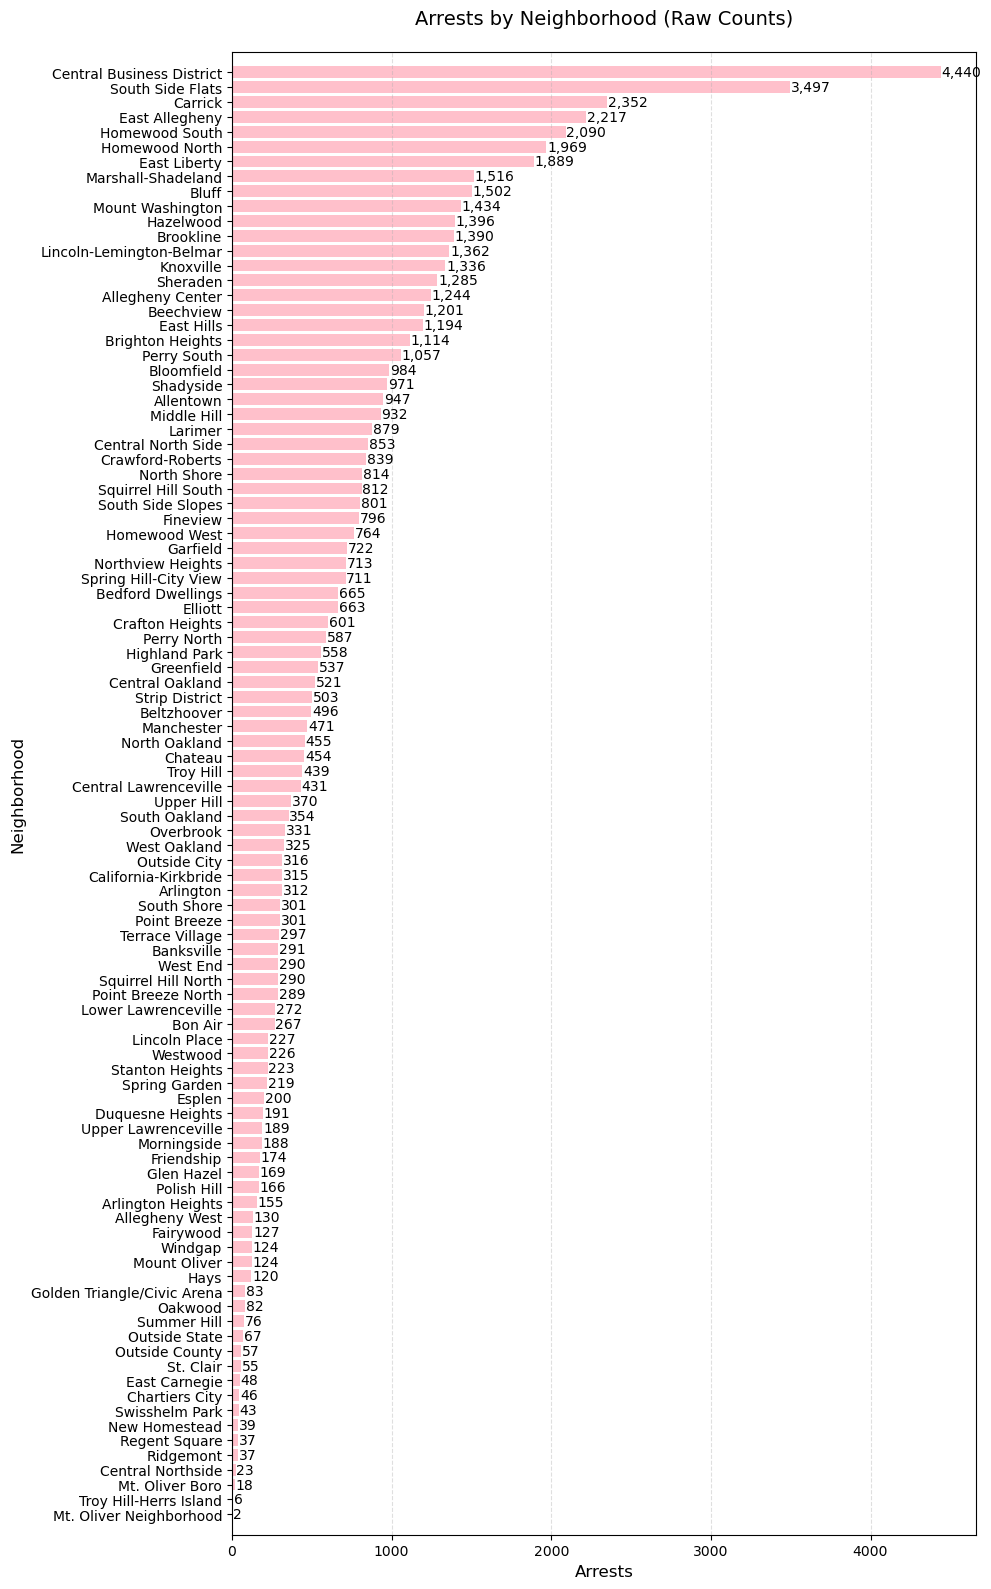

In [68]:
# Get neighborhood counts (sorted ascending)
neighborhood_counts = arrests['INCIDENTNEIGHBORHOOD'].value_counts().sort_values()

# Create plot
plt.figure(figsize=(10, 16))
bars = plt.barh(neighborhood_counts.index, neighborhood_counts.values, 
               color='pink', height=0.8)

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2, 
             f'{int(width):,}', 
             va='center', ha='left', fontsize=10)

# Formatting
plt.title('Arrests by Neighborhood (Raw Counts)', fontsize=14, pad=20)
plt.xlabel('Arrests', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.margins(y=0.01)
plt.tight_layout()
plt.show()

# Conclusions

#### The results of the analysis aligned closely with what I personally already assumed about crime patterns in the city, with one exception. I was surprised with the number of arrests in Mt Washington. There werenâ€™t any unexpected trends in the demographics or timing of arrests. The data provided a clear view of where and when arrests are most common. Overall, the findings confirmed existing perceptions about neighbohoods with good reputations, only revealing one major surprise, in my opinion.